# Approximate the Q-function using a linear representation for the lunar lander problem. 

In [1]:
import numpy as np
# First step is to get the environment gym. 
import gym 

In [2]:
# Second step is to use the "make" function to setup the environment:
env = gym.make("LunarLander-v2")

In [3]:
# Third step is to "reset" the environment to its initial state:
env.reset()
# Keep track of the rewards
rewards = [ ]
# Keep track of actual steps (simulation could end early)
steps = [ ]
# Number of simulation steps. 
num_steps = 1_000
# Let's just apply a force of one unit to the right. 
for k in range(num_steps):
    # Fourth step is to take an action or a control as we call it. 
    random_control = np.random.randint(4)
    next_state, reward, isDone, _ = env.step(random_control)
    rewards.append(reward)
    steps.append(k)
    #env.render( )
    print("The next state is ", next_state)
    print("The reward is ", reward)    
    # Check to see if the episode is over:
    if isDone==True:    
        print("The episode is over!")
        break;

The next state is  [-0.00987139  1.4008267  -0.5037817  -0.23739818  0.01277509  0.14170094
  0.          0.        ]
The reward is  -1.9075976193689985
The next state is  [-0.01492968  1.394879   -0.5153192  -0.2644554   0.02216624  0.18784037
  0.          0.        ]
The reward is  -2.6089503707536026
The next state is  [-0.02007618  1.3883287  -0.5263921  -0.29133764  0.03377121  0.23212114
  0.          0.        ]
The reward is  -2.7840804262913523
The next state is  [-0.02514458  1.382384   -0.51907986 -0.26453197  0.04587906  0.2421797
  0.          0.        ]
The reward is  0.9791208914880201
The next state is  [-0.0301198   1.3758428  -0.50736314 -0.29104632  0.05562824  0.19500147
  0.          0.        ]
The reward is  -0.5925248491765831
The next state is  [-0.03524904  1.3700392  -0.5222735  -0.25830472  0.06487986  0.18504955
  0.          0.        ]
The reward is  -0.4315475062541509
The next state is  [-0.04037876  1.3636365  -0.5222992  -0.28499082  0.07412992  0.1

In [29]:
def approx_Q(theta, x):   
    """
    Linear function approximator to Q-function. 
    """
#     theta = np.hstack([1, theta])
#     #print("theta = ", theta)
#     x = np.hstack([u, x])
#     #print("x = ", x)

    Q_value = np.dot(theta, x)
    #print("Q_value = ", Q_value)
    return Q_value

In [31]:
def get_control(thetas, x, num_controls):
    """
    Need to minimize over u. 
    """   
    Q_values = [approx_Q(thetas[u,:], x) for u in range(num_controls)] 
    u_opt = np.argmin(Q_values)
    
    return u_opt

In [39]:
def update_thetas(thetas, u, reward, step, g=10, rho=0.95):
    """
    Update thetas based on obtained reward. 
    """
    
    thetas[u,:] = thetas[u,:] + (g/(1+step)**rho)*reward
    
    return thetas

In [53]:
def simulate_lander(thetas=np.zeros((4, 8)),
                    num_controls=4,
                    g=10,
                    rho=0.95):
    """ 
    Runs the lunar lander system, 
    based on some random initial condition x0, 
    with fixed policy parameter theta being used for the whole simulation run,
    the simulation horizon is random each run,
    gamma is a discount parameter
    
    Returns: J the cost-to-go unless (sum of negative rewards)
    """
    # Number of simulation steps. 
    num_steps = 200
    
    # Need to update thetas across episodes. 
    num_episodes = 10_000
    
    # Keep track of cost-to-gos by episode to see learning progression. 
    cost_to_gos = [ ]
    
    for i in range(num_episodes):
        
        # Reset the environment to its initial state:
        x0 = env.reset()
#         # Keep track of the states
#         states = []
#         states.append(x0)
        # Keep track of the rewards
        rewards = [ ]
        # Keep track of actual steps (simulation could end early)
        steps = [ ]

        # Run simulation. 
        for j in range(1, num_steps):

            u = get_control(thetas, x0, num_controls)        
            next_state, reward, isDone, _ = env.step(u)
#             states.append(next_state)
            rewards.append(reward)
            steps.append(k)
            step = (i+1)*j
            thetas = update_thetas(thetas, u, reward, step,
                                   g=g, rho=rho)

            #env.render( )
    #         print("The next state is ", next_state)
    #         print("The reward is ", reward)    
            # Check to see if the episode is over:
            if isDone==True:    
                # print("The episode is over!")

#                 # To compute the cost-to-go
                cumulative_costs = np.cumsum(rewards)
                # Update the theta vector: 
#                 thetas = update_thetas(thetas, cumulative_costs[-1],
#                                        g=g, rho=rho, episode=i)
            
                cost_to_gos.append(cumulative_costs[-1])
                break;
                
#     #             print("states = ", states)
#                 return cumulative_costs[-1], states, rewards
            # Next initial condition
            x0 = next_state
        
    return thetas, cost_to_gos

In [54]:
#thetas = np.random.rand(8)

num_controls = 4
num_params = 8
# Need one theta vector per control (for accessing learned optimal policy):
thetas = np.zeros((num_controls, num_params))

# print("initial theta_0 = ", thetas)
g=1
rho=0.95

thetas, cost_to_gos = simulate_lander(thetas=thetas,
                                     num_controls=num_controls,
                                     g=g,
                                     rho=rho
                                     )

In [55]:
thetas

array([[-51.09421793, -51.09421793, -51.09421793, -51.09421793,
        -51.09421793, -51.09421793, -51.09421793, -51.09421793],
       [ -4.41959812,  -4.41959812,  -4.41959812,  -4.41959812,
         -4.41959812,  -4.41959812,  -4.41959812,  -4.41959812],
       [ -4.41960039,  -4.41960039,  -4.41960039,  -4.41960039,
         -4.41960039,  -4.41960039,  -4.41960039,  -4.41960039],
       [ -4.41980643,  -4.41980643,  -4.41980643,  -4.41980643,
         -4.41980643,  -4.41980643,  -4.41980643,  -4.41980643]])

In [50]:
cost_to_gos

[-62.46069810378471,
 -169.8365032890777,
 -433.6823303990211,
 -0.35566147616643207,
 -139.10690576693614,
 -185.9310275638271,
 -303.8856283854169,
 -364.4281907456956,
 -69.22714326819684,
 -349.0518778354017,
 -119.97440016792574,
 -169.70394966201715,
 -232.35996858856055,
 -67.89904154478005,
 -339.23491381710636,
 -347.2028215195055,
 -146.56431894336833,
 -166.43393122172307,
 -122.226033139902,
 -287.3541094819848,
 -235.66618450452862,
 -244.8220012144703,
 -141.02872122504633,
 -383.32354408776257,
 -82.53151968532651,
 -153.15881900912228,
 -133.7938163384118,
 -318.53969967052365,
 -23.34348293147559,
 -145.29851970473482,
 -140.89905032047187,
 -304.5709554448136,
 -239.91115828574738,
 -310.4186515421279,
 -49.28044112198185,
 -64.66694343589089,
 -173.86149638967117,
 -153.25964597559025,
 -313.63999493293244,
 -85.52630075771725,
 -342.57713439405734,
 -129.33848264197405,
 -343.3276105563505,
 -191.81631444550504,
 -347.7841574029855,
 -131.37698423214502,
 -468.93403

In [51]:
import matplotlib.pyplot as plt

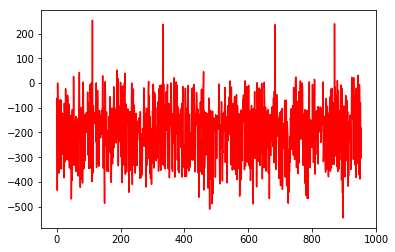

In [52]:
# Plot the cost-to-gos: 
plt.figure()
plt.plot(np.arange(len(cost_to_gos)), cost_to_gos, 'r-')
plt.show()

NameError: name 'N' is not defined

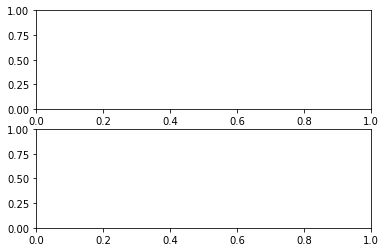

In [24]:
# Plot thetas: 
fig, axs = plt.subplots(2)

axs[0].plot(np.arange(N), thetas[:,0], 'r:', label=r"$\theta_1[k]$")
axs[0].plot(np.arange(N), thetas[:,1], 'b:', label=r"$\theta_2[k]$")
axs[1].plot(np.arange(N), gammas, 'b:', label=r"$\Gamma(\theta[k])$")

axs[1].set_xlabel("qSGD Update k")
axs[0].legend()
axs[1].legend()

